# Team 8 Final Project
## *Rainfall in Australia*

Authors:
* Deep Prakash Bhanushali
* Genghui Cui
* Yuxuan Qian
* Jiannan Zhu

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_iris
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.externals import joblib
from sklearn import svm
# set up our pipeline for hyperparameter tuning
from sklearn.model_selection import validation_curve

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [0]:
#Lets read in the Australian rain dataset
australia = pd.read_csv('/content/drive/Shared drives/Python/original.csv')

In [0]:
australia.shape

(142193, 24)

In [0]:
australia.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008/12/1,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008/12/2,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008/12/3,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008/12/4,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008/12/5,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
5,2008/12/6,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,2008/12/7,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,2008/12/8,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,2008/12/9,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,2008/12/10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


In [0]:
#Lets take a look at the data types
australia.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

In [0]:
# return some summary statistics on each column
australia.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [0]:
#Lets get a list of locations to gain some insights on data
australia['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [0]:
#Time to clean up our data
australia = australia.drop(['RainToday',
 'RainTomorrow', 'RISK_MM'], axis =1)
australia.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,2008/12/1,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,2008/12/2,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,2008/12/3,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,2008/12/4,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,2008/12/5,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7


In [0]:
#Lets do some recoding now
#If rainfall > 0 mm, then 1 (It will rain)
#If rainfall = 0 mm, then 0 (No rain)
australia['Rainfall_Status'] = np.where(australia['Rainfall'] > 0, '1', '0')
australia.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Rainfall_Status
0,2008/12/1,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,1
1,2008/12/2,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0
2,2008/12/3,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0
3,2008/12/4,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0
4,2008/12/5,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,1


In [0]:
#Lets drop the rainfall column because while building our model, it will act as a direct predictor
australia = australia.drop(['Rainfall'], axis =1)
australia.head()

,Date,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Rainfall_Status
0,2008/12/1,Albury,13.4,22.9,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,1
1,2008/12/2,Albury,7.4,25.1,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0
2,2008/12/3,Albury,12.9,25.7,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0
3,2008/12/4,Albury,9.2,28.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0
4,2008/12/5,Albury,17.5,32.3,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,1


# Data EDA and visualization

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 0.5, 'Frequency')

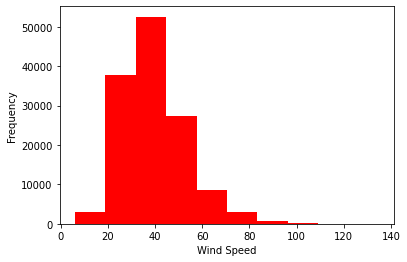

In [0]:
#Lets build some plots to explore our data more
fig, axes = plt.subplots() 
axes.hist(australia.WindGustSpeed, color="red") # first row, second entry (right top)
axes.set_xlabel("Wind Speed")
axes.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

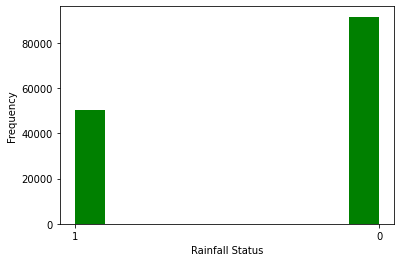

In [0]:
fig, axes = plt.subplots() 
axes.hist(australia.Rainfall_Status, color="green") 
axes.set_xlabel("Rainfall Status")
axes.set_ylabel("Frequency")

In [0]:
#Lets build a correlation matrix to get some info about our predictor variables
correlation_matrix = australia.corr().round(2)
correlation_matrix

,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.00,0.74,0.47,0.07,0.18,0.18,0.18,-0.23,0.01,-0.45,-0.46,0.08,0.02,0.90,0.71
MaxTemp,0.74,1.00,0.59,0.47,0.07,0.01,0.05,-0.51,-0.51,-0.33,-0.43,-0.29,-0.28,0.89,0.98
Evaporation,0.47,0.59,1.00,0.37,0.20,0.19,0.13,-0.51,-0.39,-0.27,-0.29,-0.19,-0.18,0.55,0.57
Sunshine,0.07,0.47,0.37,1.00,-0.03,0.01,0.06,-0.49,-0.63,0.04,-0.02,-0.68,-0.70,0.29,0.49
WindGustSpeed,0.18,0.07,0.20,-0.03,1.00,0.60,0.69,-0.22,-0.03,-0.46,-0.41,0.07,0.11,0.15,0.03
WindSpeed9am,0.18,0.01,0.19,0.01,0.60,1.00,0.52,-0.27,-0.03,-0.23,-0.17,0.02,0.05,0.13,0.01
WindSpeed3pm,0.18,0.05,0.13,0.06,0.69,0.52,1.00,-0.15,0.02,-0.30,-0.25,0.05,0.03,0.16,0.03
Humidity9am,-0.23,-0.51,-0.51,-0.49,-0.22,-0.27,-0.15,1.00,0.67,0.14,0.19,0.45,0.36,-0.47,-0.50
Humidity3pm,0.01,-0.51,-0.39,-0.63,-0.03,-0.03,0.02,0.67,1.00,-0.03,0.05,0.52,0.52,-0.22,-0.56
Pressure9am,-0.45,-0.33,-0.27,0.04,-0.46,-0.23,-0.30,0.14,-0.03,1.00,0.96,-0.13,-0.15,-0.42,-0.29


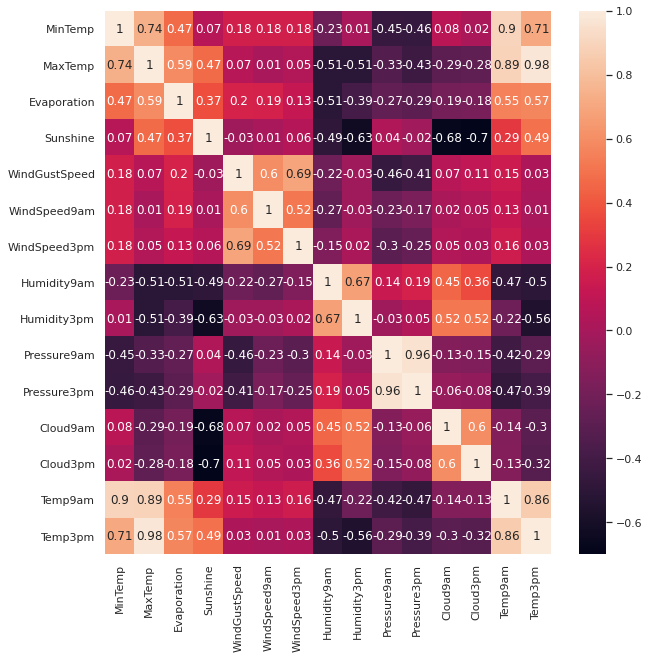

In [0]:
# bring to life with color via sns
# specify dimensions of plot
sns.set(rc={'figure.figsize':(10,10)})
# make a correlation matrix
sns.heatmap(data=correlation_matrix, annot=True)

In [0]:
australia.shape

(142193, 21)

In [0]:
#Lets count the number of missing values in the columns Sunshine and Evaporation
print(sum(pd.isnull(australia['Sunshine'])))
print(sum(pd.isnull(australia['Evaporation'])))

67816
60843


In [0]:
#Lets drop the na values
australia = australia.dropna()

In [0]:
australia.dtypes

Date                object
Location            object
MinTemp            float64
MaxTemp            float64
Evaporation        float64
Sunshine           float64
WindGustDir         object
WindGustSpeed      float64
WindDir9am          object
WindDir3pm          object
WindSpeed9am       float64
WindSpeed3pm       float64
Humidity9am        float64
Humidity3pm        float64
Pressure9am        float64
Pressure3pm        float64
Cloud9am           float64
Cloud3pm           float64
Temp9am            float64
Temp3pm            float64
Rainfall_Status     object
dtype: object

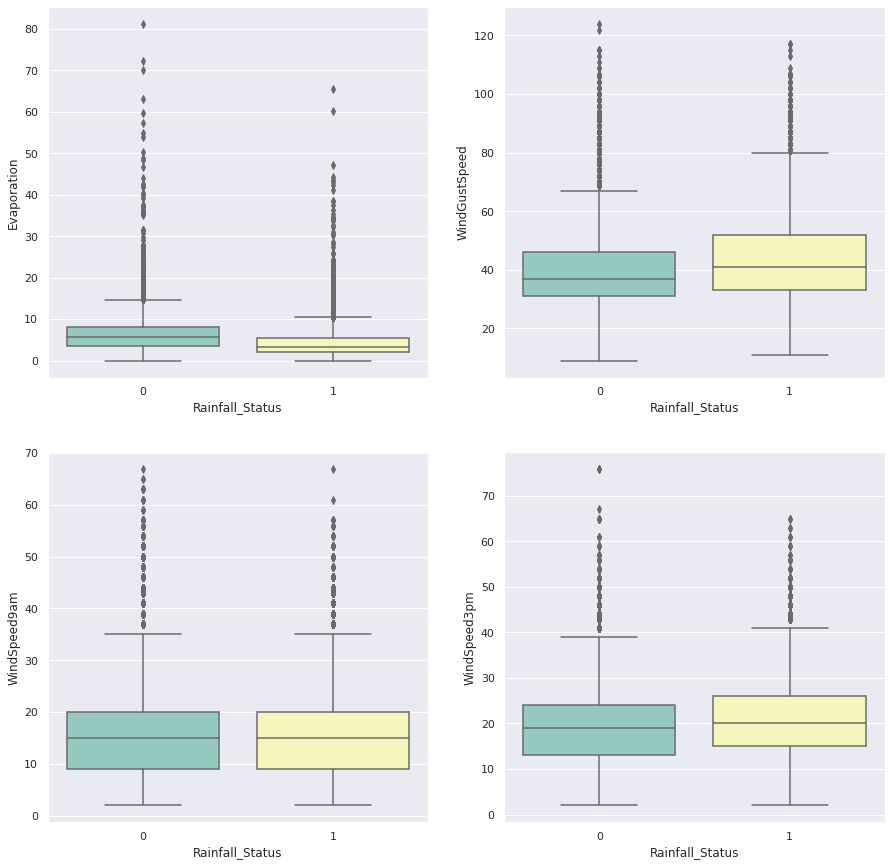

In [0]:
# check the outlier of the numerical variables
figure, axes = plt.subplots(2, 2, figsize=(15, 15))
sns.boxplot(x='Rainfall_Status', y='Evaporation',data=australia, ax=axes[0, 0], palette="Set3")
sns.boxplot(x='Rainfall_Status', y='WindGustSpeed',data=australia, ax=axes[0, 1], palette="Set3")
sns.boxplot(x='Rainfall_Status', y='WindSpeed9am',data=australia, ax=axes[1, 0], palette="Set3")
sns.boxplot(x='Rainfall_Status', y='WindSpeed3pm',data=australia, ax=axes[1, 1], palette="Set3")
plt.show()

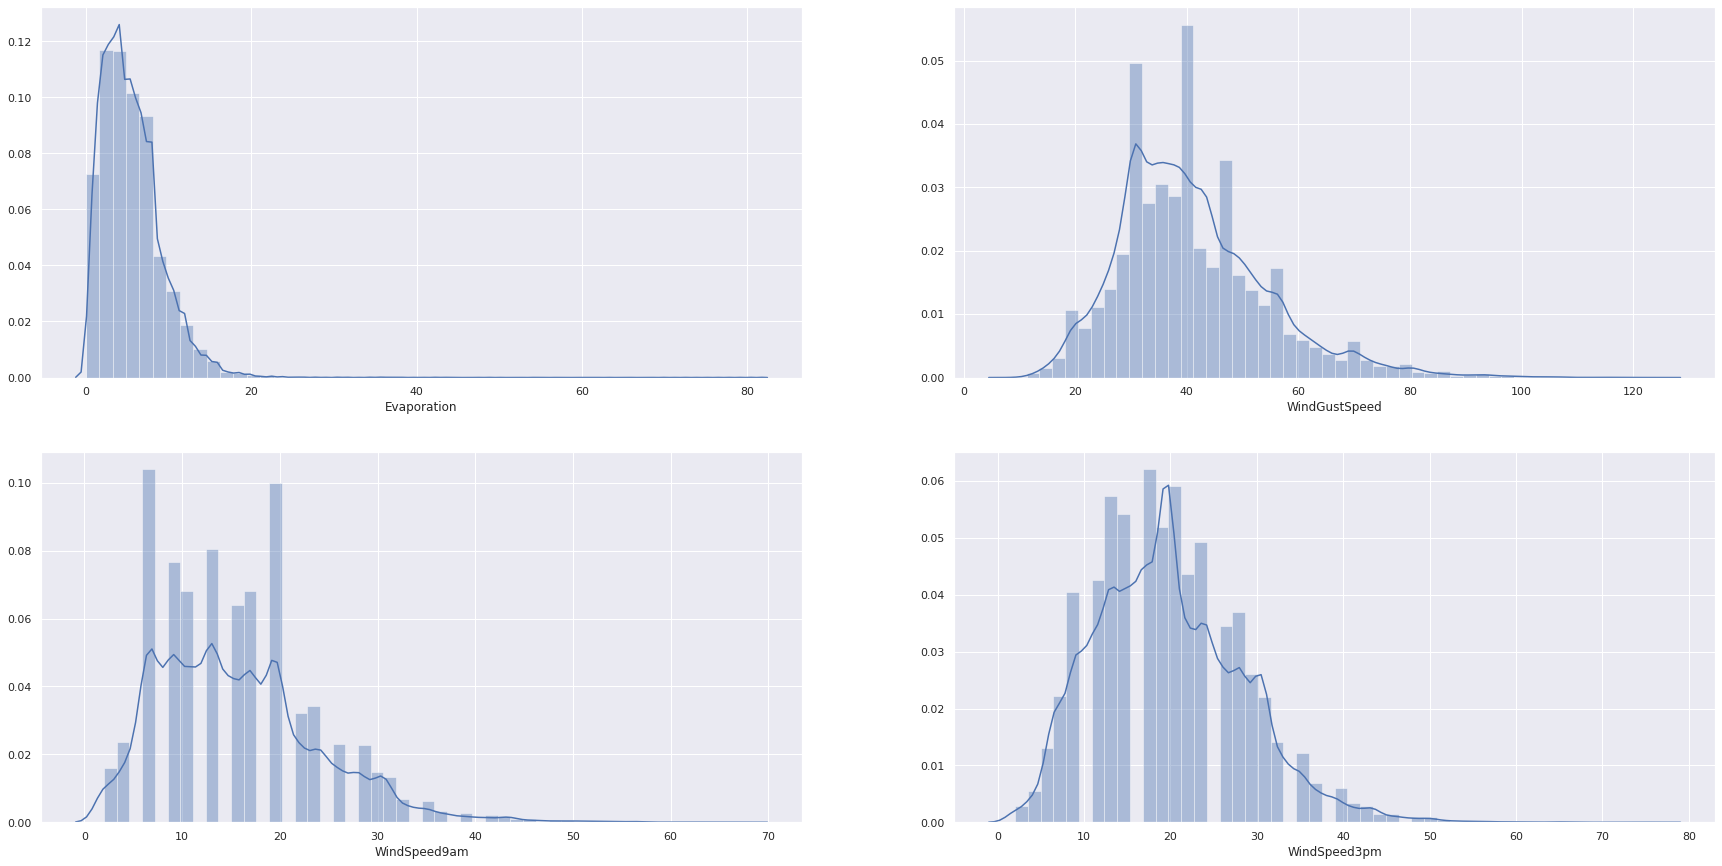

In [0]:
figure, axes = plt.subplots(2, 2, figsize=(30, 15))
sns.distplot(a=australia['Evaporation'].dropna(),ax=axes[0, 0])
sns.distplot(a=australia['WindGustSpeed'].dropna(),ax=axes[0, 1])
sns.distplot(a=australia['WindSpeed9am'].dropna(),ax=axes[1, 0])
sns.distplot(a=australia['WindSpeed3pm'].dropna(),ax=axes[1, 1])
plt.show()

In [0]:
list = ['Evaporation','WindGustSpeed','WindSpeed9am','WindSpeed3pm']
def find_outliers(df, feature):
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    Lower_fence = df[feature].quantile(0.25) - (IQR * 3)
    Upper_fence = df[feature].quantile(0.75) + (IQR * 3)
    print('{feature} outliers are values < {lowerboundary} or > {upperboundary}'\
          .format(feature=feature, lowerboundary=Lower_fence, upperboundary=Upper_fence))
    out_of_middan = (df[feature] < Lower_fence).sum()
    out_of_top = (df[feature] > Upper_fence).sum()
    print(f'the number of upper outlier {out_of_top}')
    print(f'the number of lower outlier {out_of_middan}')    
for feature in list:
    find_outliers(australia, feature)
    print()

Evaporation outliers are values < -11.0 or > 21.200000000000003
the number of upper outlier 138
the number of lower outlier 0

WindGustSpeed outliers are values < -20.0 or > 99.0
the number of upper outlier 70
the number of lower outlier 0

WindSpeed9am outliers are values < -24.0 or > 53.0
the number of upper outlier 72
the number of lower outlier 0

WindSpeed3pm outliers are values < -26.0 or > 65.0
the number of upper outlier 3
the number of lower outlier 0



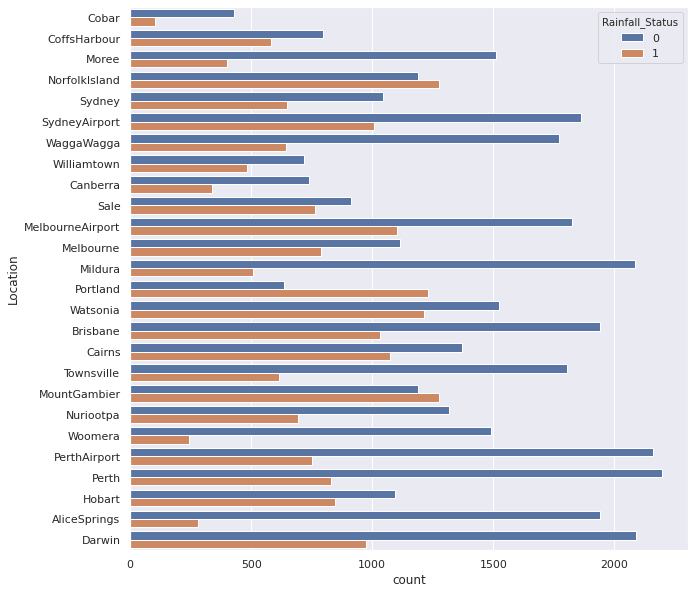

In [0]:
#Take a look at the categorical variable Location and see if different places rain more or less in Australia
ax = sns.countplot(y="Location", hue="Rainfall_Status", data=australia)

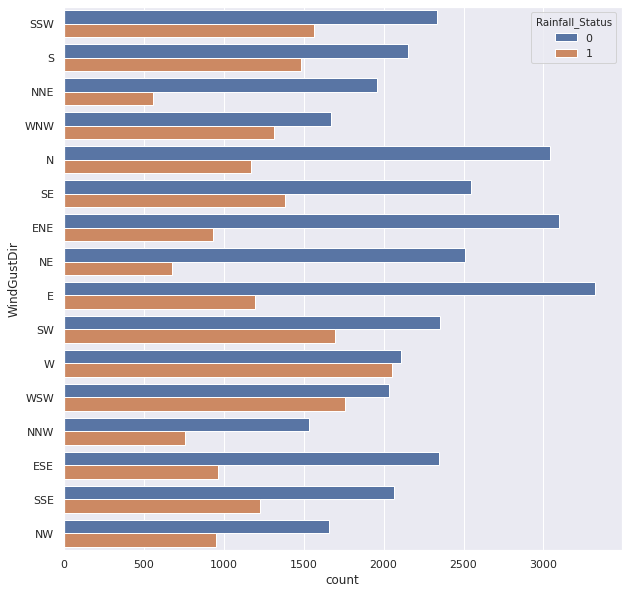

In [0]:
#Let's look at another categorical variable WindGustDir and see if it changes when climate changes
ax = sns.countplot(y="WindGustDir", hue="Rainfall_Status", data=australia)

# Feature engineering

1. Polynomials, interaction terms, or more “risk scores”
developed by you.

In [0]:
#Before adding polynomial features, let's first make subsets for numeric and categorical variables
australia.head()

,Date,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Rainfall_Status
5939,2009/1/1,Cobar,17.9,35.2,12.0,12.3,SSW,48.0,ENE,SW,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0
5940,2009/1/2,Cobar,18.4,28.9,14.8,13.0,S,37.0,SSE,SSE,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0
5942,2009/1/4,Cobar,19.4,37.6,10.8,10.6,NNE,46.0,NNE,NNW,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0
5943,2009/1/5,Cobar,21.9,38.4,11.4,12.2,WNW,31.0,WNW,WSW,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0
5944,2009/1/6,Cobar,24.2,41.0,11.2,8.4,WNW,35.0,NW,WNW,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0


In [0]:
#Time to clean up our data
australia = australia.drop(['Date'], axis =1)
australia.head()

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Rainfall_Status
5939,Cobar,17.9,35.2,12.0,12.3,SSW,48.0,ENE,SW,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0
5940,Cobar,18.4,28.9,14.8,13.0,S,37.0,SSE,SSE,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0
5942,Cobar,19.4,37.6,10.8,10.6,NNE,46.0,NNE,NNW,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0
5943,Cobar,21.9,38.4,11.4,12.2,WNW,31.0,WNW,WSW,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0
5944,Cobar,24.2,41.0,11.2,8.4,WNW,35.0,NW,WNW,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0


# Balance our data for modeling

0    36755
1    19711
Name: Rainfall_Status, dtype: int64

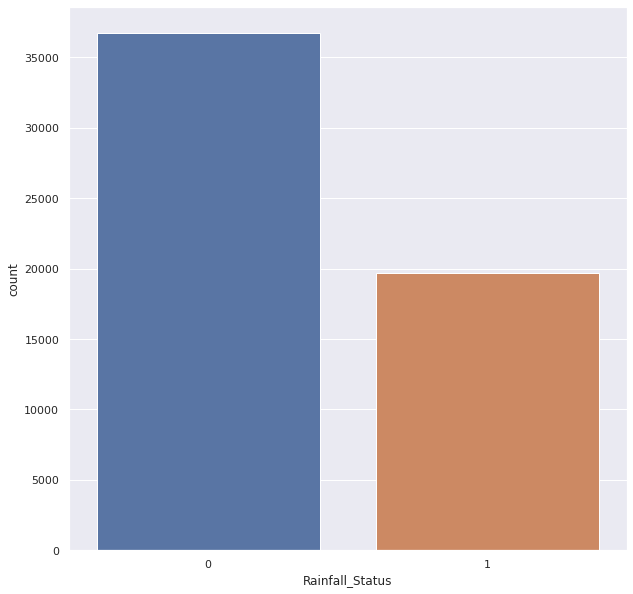

In [0]:
T=australia.groupby(['Rainfall_Status']).size()
# check 1s and 0s in target variable
sns.countplot(x="Rainfall_Status", data=australia)
australia.loc[:,'Rainfall_Status'].value_counts()

In [0]:
T_1=australia.iloc[:,:][australia[australia.T.index[-1]]=='1']
print(T_1)
T_0=australia.iloc[:,:][australia[australia.T.index[-1]]=='0']
print(T_0)

       Location  MinTemp  MaxTemp  ...  Temp9am  Temp3pm Rainfall_Status
5958      Cobar     23.3     39.4  ...     27.0     37.0               1
5961      Cobar     20.3     36.0  ...     24.7     33.4               1
5962      Cobar     22.1     34.7  ...     28.1     33.2               1
5972      Cobar     23.6     40.4  ...     29.9     38.7               1
5973      Cobar     24.1     41.4  ...     28.2     38.8               1
...         ...      ...      ...  ...      ...      ...             ...
139047   Darwin     24.7     33.7  ...     27.7     33.1               1
139054   Darwin     24.4     27.4  ...     25.5     25.9               1
139055   Darwin     23.9     27.2  ...     24.8     26.9               1
139077   Darwin     21.7     33.9  ...     27.1     31.2               1
139088   Darwin     20.4     31.4  ...     23.1     31.2               1

[19711 rows x 20 columns]
       Location  MinTemp  MaxTemp  ...  Temp9am  Temp3pm Rainfall_Status
5939      Cobar     17.9

In [0]:
#We choose each 15000 of each to make the balance df
T_1=T_1.sample(15000)  
T_0=T_0.sample(15000)
australia=pd.concat((T_1,T_0))
australia

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Rainfall_Status
83330,Brisbane,17.8,26.1,8.6,9.2,SSE,39.0,S,SE,6.0,15.0,72.0,52.0,1025.5,1023.2,2.0,4.0,22.9,24.3,1
100961,Nuriootpa,13.8,20.1,8.4,2.9,WNW,52.0,E,SSE,9.0,11.0,64.0,82.0,1010.9,1008.3,8.0,7.0,13.9,16.9,1
39162,Williamtown,17.0,25.5,4.2,1.2,E,41.0,NE,ENE,11.0,28.0,76.0,62.0,1021.7,1019.0,7.0,7.0,21.9,24.7,1
97612,MountGambier,5.3,13.4,4.2,9.2,WSW,59.0,W,WSW,33.0,35.0,66.0,47.0,1016.4,1017.6,5.0,4.0,10.2,11.3,1
119204,Perth,9.5,18.8,2.6,4.8,SW,39.0,W,W,13.0,20.0,75.0,66.0,1019.4,1018.4,7.0,7.0,15.9,18.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82888,Brisbane,20.8,28.5,6.2,3.8,NE,22.0,NNE,NE,6.0,7.0,60.0,52.0,1018.8,1015.5,6.0,5.0,25.9,27.0,0
82751,Brisbane,12.3,20.9,3.0,1.2,WSW,15.0,SW,NE,4.0,6.0,72.0,63.0,1023.4,1021.0,7.0,7.0,15.9,19.2,0
105300,Woomera,7.3,21.7,4.4,10.0,SE,28.0,ENE,N,17.0,11.0,71.0,21.0,1024.1,1020.7,2.0,0.0,11.8,20.7,0
36608,WaggaWagga,16.6,28.6,6.4,11.2,ENE,50.0,E,NE,24.0,17.0,52.0,39.0,1022.2,1019.8,6.0,6.0,20.7,27.6,0


In [0]:
#Lets split the data into training and validation first
y = australia['Rainfall_Status']
X = australia.drop(columns='Rainfall_Status')

In [0]:
print(X.shape, y.shape)

(30000, 19) (30000,)


In [0]:
X.head()

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
83330,Brisbane,17.8,26.1,8.6,9.2,SSE,39.0,S,SE,6.0,15.0,72.0,52.0,1025.5,1023.2,2.0,4.0,22.9,24.3
100961,Nuriootpa,13.8,20.1,8.4,2.9,WNW,52.0,E,SSE,9.0,11.0,64.0,82.0,1010.9,1008.3,8.0,7.0,13.9,16.9
39162,Williamtown,17.0,25.5,4.2,1.2,E,41.0,NE,ENE,11.0,28.0,76.0,62.0,1021.7,1019.0,7.0,7.0,21.9,24.7
97612,MountGambier,5.3,13.4,4.2,9.2,WSW,59.0,W,WSW,33.0,35.0,66.0,47.0,1016.4,1017.6,5.0,4.0,10.2,11.3
119204,Perth,9.5,18.8,2.6,4.8,SW,39.0,W,W,13.0,20.0,75.0,66.0,1019.4,1018.4,7.0,7.0,15.9,18.0


In [0]:
y.head()

83330     1
100961    1
39162     1
97612     1
119204    1
Name: Rainfall_Status, dtype: object

In [0]:
categorical = ['Location','WindGustDir','WindDir9am','WindDir3pm',]
for i in categorical:
    print(X.loc[:, i].value_counts())

Brisbane            1636
Darwin              1597
MelbourneAirport    1584
SydneyAirport       1571
Perth               1539
Watsonia            1525
NorfolkIsland       1460
PerthAirport        1446
MountGambier        1432
Cairns              1376
Portland            1225
Mildura             1216
WaggaWagga          1216
Townsville          1180
Nuriootpa           1075
Hobart              1070
Melbourne           1039
AliceSprings         992
Sale                 975
Moree                968
Sydney               890
CoffsHarbour         781
Woomera              772
Williamtown          632
Canberra             548
Cobar                255
Name: Location, dtype: int64
W      2425
E      2281
SW     2279
WSW    2130
N      2123
SE     2120
SSW    2075
S      2055
ENE    2012
SSE    1731
WNW    1709
ESE    1666
NE     1570
NW     1401
NNE    1236
NNW    1187
Name: WindGustDir, dtype: int64
N      2552
W      2180
E      2130
SSE    2118
SW     1970
SE     1951
S      1910
ENE    1905
W

In [0]:
#Let's subset X into 2 subsets: numeric and categorical
X_cate = X[["Location","WindGustDir","WindDir9am","WindDir3pm"]]
X_cate.head()

,Location,WindGustDir,WindDir9am,WindDir3pm
83330,Brisbane,SSE,S,SE
100961,Nuriootpa,WNW,E,SSE
39162,Williamtown,E,NE,ENE
97612,MountGambier,WSW,W,WSW
119204,Perth,SW,W,W


In [0]:
X_num = X.drop(["Location","WindGustDir","WindDir9am","WindDir3pm"], axis=1)
X_num.head()

,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
83330,17.8,26.1,8.6,9.2,39.0,6.0,15.0,72.0,52.0,1025.5,1023.2,2.0,4.0,22.9,24.3
100961,13.8,20.1,8.4,2.9,52.0,9.0,11.0,64.0,82.0,1010.9,1008.3,8.0,7.0,13.9,16.9
39162,17.0,25.5,4.2,1.2,41.0,11.0,28.0,76.0,62.0,1021.7,1019.0,7.0,7.0,21.9,24.7
97612,5.3,13.4,4.2,9.2,59.0,33.0,35.0,66.0,47.0,1016.4,1017.6,5.0,4.0,10.2,11.3
119204,9.5,18.8,2.6,4.8,39.0,13.0,20.0,75.0,66.0,1019.4,1018.4,7.0,7.0,15.9,18.0


In [0]:
from sklearn.preprocessing import PolynomialFeatures

#Lets create some polynomial features
poly_features = PolynomialFeatures(degree=2)

# transforms the existing features to higher degree features.
aus_poly = poly_features.fit_transform(X_num)
tmp = pd.DataFrame(aus_poly)

print("Original Data")
print(X_num.shape) 
print("##########################")
print("Poly Features")
print(tmp.shape)

Original Data
(30000, 15)
##########################
Poly Features
(30000, 136)


In [0]:
tmp.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135
0,1.0,17.8,26.1,8.6,9.2,39.0,6.0,15.0,72.0,52.0,1025.5,1023.2,2.0,4.0,22.9,24.3,316.84,464.58,153.08,163.76,694.2,106.8,267.0,1281.6,925.6,18253.90,18212.96,35.6,71.2,407.62,432.54,681.21,224.46,240.12,1017.9,156.6,391.5,1879.2,1357.2,26765.55,...,30.0,60.0,343.5,364.5,5184.0,3744.0,73836.0,73670.4,144.0,288.0,1648.8,1749.6,2704.0,53326.0,53206.4,104.0,208.0,1190.8,1263.6,1051650.25,1049291.60,2051.0,4102.0,23483.95,24919.65,1046938.24,2046.4,4092.8,23431.28,24863.76,4.0,8.0,45.8,48.6,16.0,91.6,97.2,524.41,556.47,590.49
1,1.0,13.8,20.1,8.4,2.9,52.0,9.0,11.0,64.0,82.0,1010.9,1008.3,8.0,7.0,13.9,16.9,190.44,277.38,115.92,40.02,717.6,124.2,151.8,883.2,1131.6,13950.42,13914.54,110.4,96.6,191.82,233.22,404.01,168.84,58.29,1045.2,180.9,221.1,1286.4,1648.2,20319.09,...,88.0,77.0,152.9,185.9,4096.0,5248.0,64697.6,64531.2,512.0,448.0,889.6,1081.6,6724.0,82893.8,82680.6,656.0,574.0,1139.8,1385.8,1021918.81,1019290.47,8087.2,7076.3,14051.51,17084.21,1016668.89,8066.4,7058.1,14015.37,17040.27,64.0,56.0,111.2,135.2,49.0,97.3,118.3,193.21,234.91,285.61
2,1.0,17.0,25.5,4.2,1.2,41.0,11.0,28.0,76.0,62.0,1021.7,1019.0,7.0,7.0,21.9,24.7,289.00,433.50,71.40,20.40,697.0,187.0,476.0,1292.0,1054.0,17368.90,17323.00,119.0,119.0,372.30,419.90,650.25,107.10,30.60,1045.5,280.5,714.0,1938.0,1581.0,26053.35,...,196.0,196.0,613.2,691.6,5776.0,4712.0,77649.2,77444.0,532.0,532.0,1664.4,1877.2,3844.0,63345.4,63178.0,434.0,434.0,1357.8,1531.4,1043870.89,1041112.30,7151.9,7151.9,22375.23,25235.99,1038361.00,7133.0,7133.0,22316.10,25169.30,49.0,49.0,153.3,172.9,49.0,153.3,172.9,479.61,540.93,610.09
3,1.0,5.3,13.4,4.2,9.2,59.0,33.0,35.0,66.0,47.0,1016.4,1017.6,5.0,4.0,10.2,11.3,28.09,71.02,22.26,48.76,312.7,174.9,185.5,349.8,249.1,5386.92,5393.28,26.5,21.2,54.06,59.89,179.56,56.28,123.28,790.6,442.2,469.0,884.4,629.8,13619.76,...,175.0,140.0,357.0,395.5,4356.0,3102.0,67082.4,67161.6,330.0,264.0,673.2,745.8,2209.0,47770.8,47827.2,235.0,188.0,479.4,531.1,1033068.96,1034288.64,5082.0,4065.6,10367.28,11485.32,1035509.76,5088.0,4070.4,10379.52,11498.88,25.0,20.0,51.0,56.5,16.0,40.8,45.2,104.04,115.26,127.69
4,1.0,9.5,18.8,2.6,4.8,39.0,13.0,20.0,75.0,66.0,1019.4,1018.4,7.0,7.0,15.9,18.0,90.25,178.60,24.70,45.60,370.5,123.5,190.0,712.5,627.0,9684.30,9674.80,66.5,66.5,151.05,171.00,353.44,48.88,90.24,733.2,244.4,376.0,1410.0,1240.8,19164.72,...,140.0,140.0,318.0,360.0,5625.0,4950.0,76455.0,76380.0,525.0,525.0,1192.5,1350.0,4356.0,67280.4,67214.4,462.0,462.0,1049.4,1188.0,1039176.36,1038156.96,7135.8,7135.8,16208.46,18349.20,1037138.56,7128.8,7128.8,16192.56,18331.20,49.0,49.0,111.3,126.0,49.0,111.3,126.0,252.81,286.20,324.00


# Data standardization (min/max or z-score)

2. Z-score Standardization

In [0]:
from scipy.stats import zscore
tmpZ = tmp.apply(zscore)

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


In [0]:
tmpZ.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135
0,NaN,0.675656,0.369898,0.957554,0.508568,-0.172093,-1.170197,-0.577716,0.191424,-0.026316,1.212792,1.213210,-0.924858,-0.231581,0.768070,0.334960,0.520006,0.476255,0.910197,0.843913,0.391930,-0.694924,-0.046359,0.758021,0.431057,0.706764,0.707391,-0.544873,0.168622,0.619447,0.456641,0.231208,0.686404,0.465629,0.103276,-0.942854,-0.316992,0.651497,0.358714,0.407166,...,-0.859647,-0.467599,-0.088254,-0.317910,0.066853,-0.051511,0.223526,0.222735,-0.804668,-0.202811,0.999057,0.616681,-0.214967,-0.004018,-0.004659,-0.791504,-0.299998,0.539764,0.375369,1.214768,1.226971,-0.918767,-0.217773,0.806939,0.369648,1.214947,-0.918731,-0.218144,0.808448,0.371325,-1.046850,-0.812745,-0.595793,-0.734661,-0.537456,0.199308,0.017774,0.660502,0.460139,0.187434
1,NaN,0.050051,-0.494745,0.902037,-1.144493,0.782088,-0.812921,-1.041538,-0.246358,1.465056,-0.857559,-0.914596,1.250454,0.922476,-0.607137,-0.751717,-0.177387,-0.308311,0.442946,-0.772656,0.463032,-0.585922,-0.670159,-0.045356,0.860671,0.040540,0.039976,0.921865,0.682671,-0.420357,-0.422142,-0.577549,0.249798,-1.003582,0.165972,-0.835489,-1.003410,-0.530392,0.938397,-0.514185,...,-0.058539,-0.224535,-0.982933,-1.082978,-0.394824,0.681254,-0.267275,-0.268620,0.743789,0.523155,-0.607667,-0.762037,1.663758,1.445093,1.441368,1.872405,1.480679,0.437761,0.642767,-0.858720,-0.895527,1.235744,0.909105,-0.622097,-0.770383,-0.915242,1.233510,0.907201,-0.623336,-0.772578,1.535935,1.440972,0.559923,0.632185,0.948482,0.301654,0.366975,-0.688842,-0.734970,-0.776537
2,NaN,0.550535,0.283434,-0.263815,-1.590558,-0.025296,-0.574738,0.929703,0.410314,0.470808,0.673933,0.613426,0.887902,0.922476,0.615270,0.393699,0.366403,0.345997,-0.116851,-1.028977,0.400438,-0.192511,1.085362,0.778992,0.698835,0.569757,0.569207,1.090500,1.136007,0.449263,0.400913,0.140880,-0.234847,-1.227321,0.166661,-0.395428,0.982127,0.768728,0.804532,0.305376,...,1.433180,1.476911,1.177721,1.083287,0.318060,0.420109,0.428323,0.425616,0.827944,0.904287,1.032072,0.880041,0.317806,0.487031,0.484556,0.801050,0.799546,0.873773,0.961368,0.672231,0.648308,0.901906,0.937748,0.638965,0.415674,0.611329,0.899806,0.935626,0.638874,0.415999,0.890239,1.112305,1.303894,1.227220,0.948482,1.307151,1.270594,0.477982,0.402383,0.249405
3,NaN,-1.279362,-1.460264,-0.263815,0.508568,1.295878,2.045284,1.741390,-0.136912,-0.274878,-0.077632,0.413498,0.162798,-0.231581,-1.172499,-1.574067,-1.073128,-1.173177,-0.734740,-0.658475,-0.767275,-0.268312,-0.487676,-1.120961,-0.979787,-1.285181,-1.283119,-0.723313,-0.843287,-1.084135,-1.186338,-1.232402,-0.633773,-0.478454,-0.418732,0.319010,-0.004801,-1.331876,-1.090293,-1.471676,...,1.143124,0.676230,-0.024885,-0.185115,-0.284497,-0.364300,-0.139194,-0.127200,-0.022024,-0.311706,-1.065642,-1.455111,-0.446303,-0.276277,-0.268567,-0.159309,-0.397302,-0.883074,-1.227485,-0.081102,0.165553,0.163093,-0.231564,-1.180266,-1.585003,0.410674,0.168687,-0.226645,-1.176204,-1.582806,-0.142875,-0.249316,-0.503901,-0.609972,-0.537456,-0.712822,-0.842816,-1.052130,-1.179662,-1.275850
4,NaN,-0.622476,-0.682085,-0.707949,-0.645951,-0.172093,-0.336554,0.002060,0.355592,0.669657,0.347782,0.527743,0.887902,0.922476,-0.301535,-0.590184,-0.730170,-0.722304,-0.704060,-0.699758,-0.591647,-0.590307,-0.463309,-0.389574,-0.191675,-0.619901,-0.618328,0.061038,0.073502,-0.616802,-0.696464,-0.725091,-0.691862,-0.745422,-0.550555,-0.554928,-0.379430,-0.283966,0.126841,-0.679171,...,0.659696,0.676230,-0.207951,-0.337187,0.253985,0.536066,0.364186,0.368412,0.798489,0.872526,0.033372,-0.208073,0.557086,0.679884,0.682584,0.936176,0.935772,0.256957,0.209941,0.344832,0.439226,0.896159,0.931648,-0.295314,-0.586331,0.525300,0.898304,0.934032,-0.292272,-0.583826,0.890239,1.112305,0.561691,0

# Convert Categorical Variables into Dummy Variables

In [0]:
#Lets use one hot encoding for categorical variables
X_cate = pd.get_dummies(X_cate, columns=categorical, drop_first=True)
X_cate.head()

,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Darwin,Location_Hobart,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_NorfolkIsland,Location_Nuriootpa,Location_Perth,Location_PerthAirport,Location_Portland,Location_Sale,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_WaggaWagga,Location_Watsonia,Location_Williamtown,Location_Woomera,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
83330,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
100961,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
39162,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
97612,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
119204,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [0]:
X_cate.dtypes

Location_Brisbane        uint8
Location_Cairns          uint8
Location_Canberra        uint8
Location_Cobar           uint8
Location_CoffsHarbour    uint8
                         ...  
WindDir3pm_SSW           uint8
WindDir3pm_SW            uint8
WindDir3pm_W             uint8
WindDir3pm_WNW           uint8
WindDir3pm_WSW           uint8
Length: 70, dtype: object

In [0]:
#Lets create some polynomial features for dummy variables
poly_features = PolynomialFeatures(degree=2)

# transforms the existing features to higher degree features.
aus_poly = poly_features.fit_transform(X_cate)
tmp2 = pd.DataFrame(aus_poly)

print("Original Data")
print(X_cate.shape) 
print("##########################")
print("Poly Features")
print(tmp2.shape)

Original Data
(30000, 70)
##########################
Poly Features
(30000, 2556)


# Merge Numeric and Dummy Variables for Modeling

In [0]:
#Now we get a nice merged data
X = pd.concat([tmpZ, tmp2], axis=1)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2516,2517,2518,2519,2520,2521,2522,2523,2524,2525,2526,2527,2528,2529,2530,2531,2532,2533,2534,2535,2536,2537,2538,2539,2540,2541,2542,2543,2544,2545,2546,2547,2548,2549,2550,2551,2552,2553,2554,2555
0,NaN,0.675656,0.369898,0.957554,0.508568,-0.172093,-1.170197,-0.577716,0.191424,-0.026316,1.212792,1.213210,-0.924858,-0.231581,0.768070,0.334960,0.520006,0.476255,0.910197,0.843913,0.391930,-0.694924,-0.046359,0.758021,0.431057,0.706764,0.707391,-0.544873,0.168622,0.619447,0.456641,0.231208,0.686404,0.465629,0.103276,-0.942854,-0.316992,0.651497,0.358714,0.407166,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,0.050051,-0.494745,0.902037,-1.144493,0.782088,-0.812921,-1.041538,-0.246358,1.465056,-0.857559,-0.914596,1.250454,0.922476,-0.607137,-0.751717,-0.177387,-0.308311,0.442946,-0.772656,0.463032,-0.585922,-0.670159,-0.045356,0.860671,0.040540,0.039976,0.921865,0.682671,-0.420357,-0.422142,-0.577549,0.249798,-1.003582,0.165972,-0.835489,-1.003410,-0.530392,0.938397,-0.514185,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NaN,0.550535,0.283434,-0.263815,-1.590558,-0.025296,-0.574738,0.929703,0.410314,0.470808,0.673933,0.613426,0.887902,0.922476,0.615270,0.393699,0.366403,0.345997,-0.116851,-1.028977,0.400438,-0.192511,1.085362,0.778992,0.698835,0.569757,0.569207,1.090500,1.136007,0.449263,0.400913,0.140880,-0.234847,-1.227321,0.166661,-0.395428,0.982127,0.768728,0.804532,0.305376,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,-1.279362,-1.460264,-0.263815,0.508568,1.295878,2.045284,1.741390,-0.136912,-0.274878,-0.077632,0.413498,0.162798,-0.231581,-1.172499,-1.574067,-1.073128,-1.173177,-0.734740,-0.658475,-0.767275,-0.268312,-0.487676,-1.120961,-0.979787,-1.285181,-1.283119,-0.723313,-0.843287,-1.084135,-1.186338,-1.232402,-0.633773,-0.478454,-0.418732,0.319010,-0.004801,-1.331876,-1.090293,-1.471676,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,NaN,-0.622476,-0.682085,-0.707949,-0.645951,-0.172093,-0.336554,0.002060,0.355592,0.669657,0.347782,0.527743,0.887902,0.922476,-0.301535,-0.590184,-0.730170,-0.722304,-0.704060,-0.699758,-0.591647,-0.590307,-0.463309,-0.389574,-0.191675,-0.619901,-0.618328,0.061038,0.073502,-0.616802,-0.696464,-0.725091,-0.691862,-0.745422,-0.550555,-0.554928,-0.379430,-0.283966,0.126841,-0.679171,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# **Modeling**

In [0]:
tmp=tmpZ

In [0]:
#fillna with 0
tmp.fillna(0, inplace=True)

In [0]:
#delete the column all = 0
tmp=tmp.loc[:, (tmp!= 0).any(axis=0)]

In [0]:
y.head()

129248    1
99147     1
66910     1
31689     1
115590    1
Name: Rainfall_Status, dtype: object

In [0]:
# We are now done with feature engineering i.e polynomial features and data standardisation
# Time to fit models now
validation_size = 0.20
seed = 123
X_train, X_validation, y_train, y_validation = train_test_split(tmp, y, test_size=validation_size, random_state=seed)

test

In [0]:
#X=X[0:1000]
#y=y[0:1000]
X=tmp
X=X.sample(1000, axis=1)
y=y

In [0]:
X.shape

(30000, 1000)

In [0]:
y.shape

(30000,)

In [0]:
validation_size = 0.20
seed = 123
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=validation_size, random_state=seed)

In [0]:
####################################################
# Spot-Check Algorithms
# for spot-checking, you can accept defaults
models = []
models.append(('GBC', GradientBoostingClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
#models.append(('LR', LogisticRegression(max_iter=1000000000000000)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('ETC', ExtraTreesClassifier()))
models.append(('BagC', BaggingClassifier()))

In [0]:
results = []
names = []

for name, model in models:
	kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

GBC: 0.786917 (0.007893)
CART: 0.713417 (0.008957)
RFC: 0.795125 (0.007386)
LDA: 0.784458 (0.008258)
KNN: 0.666958 (0.010078)
NB: 0.672625 (0.009404)
ETC: 0.781125 (0.006672)
BagC: 0.769125 (0.008409)


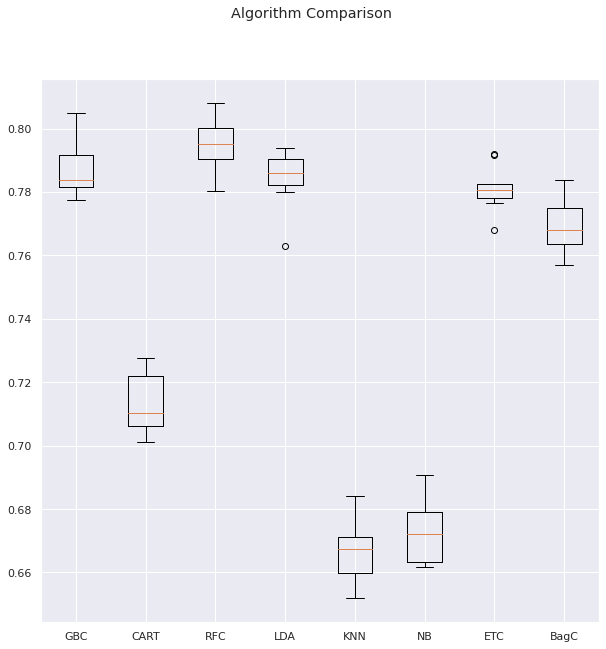

In [0]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

##  is the best

In [0]:
############################################
# Make predictions on validation dataset
Model1 = LinearDiscriminantAnalysis()
Model1.fit(X_train, y_train)
predictions = Model1.predict(X_train)
print(accuracy_score(y_train, predictions))
print(confusion_matrix(y_train, predictions))
print(classification_report(y_train, predictions))

0.8077083333333334
[[9596 2381]
 [2234 9789]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.81     11977
           1       0.80      0.81      0.81     12023

    accuracy                           0.81     24000
   macro avg       0.81      0.81      0.81     24000
weighted avg       0.81      0.81      0.81     24000



## hyperparameter tuning 

In [0]:
# let's try a pipeline 
pipe_lr = make_pipeline(StandardScaler(), # z-score
                        PCA(0.95), # specify cumulative variance (it automatically selects) # the right # of PCs
                        LogisticRegression(random_state=seed,
                                  max_iter=1000000000000000,
                                   solver='lbfgs'))

from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train,
                         cv=12)

print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/0 %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy scores: [0.7795 0.7675 0.763  0.74   0.7595 0.751  0.7615 0.7745 0.755  0.77
 0.7605 0.7605]
CV accuracy: 0.762 +/0 0.010


In [0]:
# set up our pipeline for hyperparameter tuning
# we are evaluating 6 different C values
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
# we are fitting 10-fold CV
train_scores, test_scores = validation_curve(
                 estimator=pipe_lr,
                 X=X_train,
                 y=y_train,
                 param_name='logisticregression__C',
                 param_range=param_range,
                 cv=10)

# so we fit the model 60 times
# and we will evaluate the model for each of the 6 "C"

In [0]:
# let's look at train_scores
print(train_scores.shape)
# show the scores - 6 rows, one for each C values
# 10 columns, one for each training validation score
print(train_scores)

(6, 10)
[[0.77828704 0.78046296 0.78240741 0.78111111 0.78143519 0.78023148
  0.78032407 0.78       0.78078704 0.78097222]
 [0.77861111 0.78217593 0.7837963  0.78203704 0.7825     0.78125
  0.7825     0.78111111 0.7824537  0.78263889]
 [0.77953704 0.78078704 0.78337963 0.78282407 0.78208333 0.7812037
  0.78240741 0.78162037 0.7825463  0.78268519]
 [0.77921296 0.78074074 0.78328704 0.7825463  0.7824537  0.78083333
  0.7825463  0.78157407 0.7824537  0.78328704]
 [0.77902778 0.78064815 0.78342593 0.7825463  0.78236111 0.78078704
  0.7824537  0.78175926 0.7824537  0.78333333]
 [0.77902778 0.78069444 0.78351852 0.7825     0.78240741 0.78078704
  0.7825463  0.78175926 0.7825     0.78333333]]


In [0]:
# let's look at test_scores
print(test_scores.shape)
# show the scores - 6 rows, one for each C values
# 10 columns, one for each training validation score
print(test_scores)

(6, 10)
[[0.78333333 0.76791667 0.74958333 0.75333333 0.76083333 0.77083333
  0.76416667 0.77083333 0.76458333 0.75541667]
 [0.78041667 0.765      0.75041667 0.74916667 0.75833333 0.76833333
  0.76125    0.76416667 0.76208333 0.76      ]
 [0.78       0.76416667 0.74875    0.75083333 0.75666667 0.76958333
  0.75958333 0.76125    0.76333333 0.75916667]
 [0.77916667 0.76458333 0.74791667 0.75125    0.75791667 0.77041667
  0.76083333 0.76208333 0.76333333 0.75875   ]
 [0.77916667 0.76416667 0.74875    0.75125    0.75875    0.77
  0.76083333 0.76208333 0.76166667 0.75875   ]
 [0.77916667 0.76416667 0.74875    0.75125    0.75875    0.77
  0.76083333 0.76208333 0.7625     0.75875   ]]


In [0]:
# make the validation curve
# we will calculate the mean and std of accuracy score
# for each "C" value
train_mean = np.mean(train_scores, axis=1)
print("======TRAIN RESULTS =========")
print(train_mean) # 6 values, one for each C value
train_std = np.std(train_scores, axis=1)
print(train_std)

print("======TEST RESULTS =========")
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
print(test_mean)
print(test_std)

======TRAIN RESULTS =========
[0.78060185 0.78190741 0.78190741 0.78189352 0.78187963 0.78190741]
[0.00101683 0.00130861 0.00108412 0.00122898 0.00129219 0.001305  ]
======TEST RESULTS =========
[0.76408333 0.76191667 0.76133333 0.761625   0.76154167 0.761625  ]
[0.00942404 0.00842491 0.00852447 0.00845628 0.00821594 0.00822101]


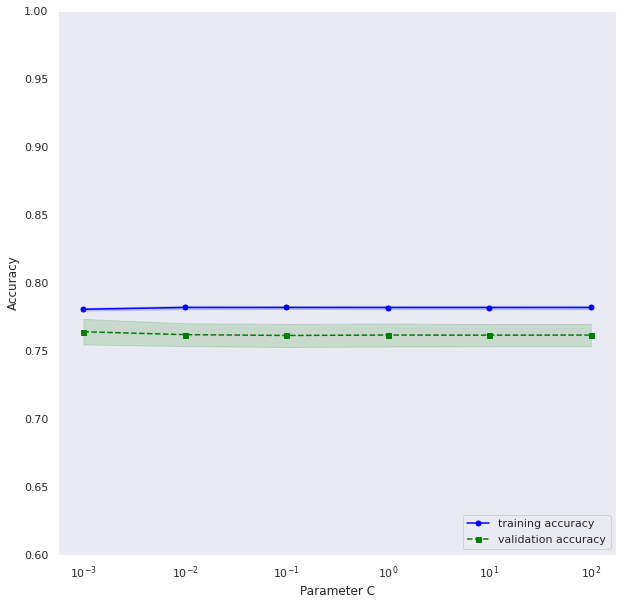

In [0]:

# visualize what you are seeing
plt.plot(param_range, train_mean,
          color='blue', marker='o',
          markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std,
                  train_mean - train_std, alpha=0.15,
                  color='blue')
plt.plot(param_range, test_mean,
          color='green', linestyle='--',
          marker='s', markersize=5,
          label='validation accuracy')
plt.fill_between(param_range,
                  test_mean + test_std,
                  test_mean - test_std,
                  alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.6, 1])
plt.show()

# Save Models and Model Results